## Final Project Submission

Please fill out:
* Student name: George Kariuki
* Student pace: part time 
* Scheduled project review date/time: 29/04/2025
* Instructor name: George Kamundia
* [Github repo URL](https://github.com/g-eez/dsc-phase-1-project.git)


# 1. Business Understanding

## Project Context

Wilson Airport is expanding its operations to include aircraft acquisition for commercial and private aviation services in North and South America. However, before investing billions of kenyan shillings into purchasing aircraft, the airport's Board of Directors requires a comprehensive risk assessment based on historical safety data.

The primary objective of this project is to leverage historical aviation accident data (1962–2023) to identify **low-risk aircraft makes and models** that would be suitable for purchase. The findings of this analysis will directly influence Wilson Airport's procurement strategy and fleet composition.

As data scientists, our role is to provide **data-driven insights** that support **strategic decision-making**, reduce **investment risk**, and promote **operational safety**.

---

## Business Questions

The business questions we are tasked to address are:

1. **Which Aircraft Makes and Models Have the Lowest Accident and Fatality Rates?**  

2. **Are Newer Aircraft Models Statistically Safer Than Older Models?**  

3. **Which Aircraft Categories and Configurations Should Be Preferred or Avoided?** 

4. **Which Aircraft is Best Suited for a Specific Country?**:  

5. **Which Aircraft Handles Injuries and Damage Better?**:

---

## Stakeholders

The key stakeholders who will rely on our findings include:

- **Board of Directors, Wilson Airport**  
  (Require high-level recommendations to inform aircraft purchasing decisions.)

- **Procurement and Acquisition Team**  
  (Need specific lists of recommended aircraft makes/models.)

- **Operations and Safety Department**  
  (Interested in trends related to aircraft safety history to adjust operational protocols.)

- **Investors and Financial Partners**  
  (Seek assurance that fleet investments are made into safer, lower-risk assets.)

- **Insurance Providers**  
  (May adjust premiums based on evidence of risk levels associated with the selected aircraft.)

---

## Expectations and Deliverables

In addition to answering the specific business questions outlined, we are expected to:

-  Perform data quality checks, basic cleaning, and exploratory analysis.
-  Use **visualizations** (bar charts, line graphs, pie charts) to highlight important findings clearly and simply.
-  Maintain a **reproducible, clean Jupyter Notebook** with clear Markdown framing and idiomatic code.
-  Provide **three clear, actionable business recommendations**.
-  Summarize findings in a **non-technical presentation** for business stakeholders.
-  Develop an **interactive dashboard** to explore accident trends and severity distributions.

---

## Business Value

The ability to make **evidence-based fleet acquisition decisions** will:

-  Reduce financial risks associated with buying unsafe or unreliable aircraft.
-  Increase customer confidence and brand reputation for Wilson Airport's new operations.
-  Improve long-term operational safety and minimize insurance costs.

By transforming raw historical data into meaningful, strategic insights, we enable Wilson Airport to make smart, safe, and profitable business moves.

---



# 2. Data Understanding

In this section, we aim to build a strong understanding of the aviation accident dataset.  
Before any cleaning, transformation, or analysis can take place, it is critical to:

- Explore the **overall structure** of the data.
- Assess the **completeness and quality** of the data.
- Understand the **meaning and role** of key columns.
- Detect any **missing values**, **strange data types**, or **anomalies**.
- Identify **time coverage** and any potential **bias** in the dataset.

**The specific steps we will follow:**

1. **Import libraries** required for data manipulation and visualization.
2. **Load** the dataset into a pandas DataFrame
3. **Inspect** the dataset’s structure (columns, data types, non-null counts).
4. **Preview** sample records to understand typical entries.
5. **Summarize** the dataset with basic descriptive statistics.
6. **Check for missing values** across all columns.
7. **Investigate key features** such as:
   - Aircraft Make
   - Aircraft Model
   - Event Date
   - Injury Severity
   - Aircraft Category
8. **Review time coverage**: What time range does the dataset cover?
9. **Identify data quality issues**, inconsistencies, or potential cleaning needs.
10. **Document** initial findings that will inform data cleaning and preparation steps later.

> Data understanding is a foundation of all strong data science projects. Skipping this phase risks introducing errors, misinterpretations, and poor business recommendations.


## Step 1: Import Required Libraries

To begin our data exploration, we need to import important Python libraries:

- **pandas**: for handling and manipulating dataframes.
- **numpy**: for numerical operations.
- **matplotlib** and **seaborn**: for creating visualizations to better understand patterns and trends in the data.


In [1030]:
# Your code here - remember to use markdown cells for comments as well!
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


## Step 2: Load the Aviation Dataset

We will now load the aviation accident dataset into a pandas DataFrame for inspection.

Our goal in this step:
- Read the `.csv` file into memory.

## Step 3: Inspect the Dataset Structure

At this stage, we use the `.info()` method to inspect the **structure** of the aviation accident dataset.

**Purpose**:
- Understand the **number of records** and **columns**.
- Check **data types** of each feature (object, float, etc.).
- See **how many non-null entries** exist for each column (helps spot missing data early).

**Findings**:
- The dataset contains **90,348 records** and **31 columns**.
- Most columns are of **object** type (i.e., text or mixed data).
- Some columns (e.g., `Number.of.Engines`) are **numerical** (`float64`).
- Many important fields such as `Latitude`, `Longitude`, `Aircraft.Category`, and `FAR.Description` have **significant missing data**.
- Critical fields like `Event.Id`, `Accident.Number`, and `Event.Date` are mostly complete but **not 100% complete**.

**Next Step**:
- We will preview a few sample rows to get a better feel for what typical records look like.



In [1031]:
# Load the aviation accident dataset
df = pd.read_csv('data/Aviation_Data.csv')

# Display basic information about the dataset
df.info()


C:\Users\HP\AppData\Local\Temp\ipykernel_15652\524183646.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Aviation_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Step 4: Preview Sample Records with `.head()`

The `.head()` method displays the **first five rows** of the dataset by default. This provides a quick look at typical entries and helps us understand:

* How the data is formatted (e.g., date formats, use of capital letters, empty cells).
* Common values in important columns like `Make`, `Model`, `Event.Date`, `Injury.Severity`, and `Aircraft.damage`.
* Which fields are frequently blank or contain placeholder values.

From the preview, we observed:

* Many records lack geographic data (`Latitude`, `Longitude`) and airport details.
* Common accident descriptors include values like `"Fatal(2)"` in `Injury.Severity`, `"Destroyed"` in `Aircraft.damage`, and `"Reciprocating"` in `Engine.Type`.
* Aircraft manufacturers like `Cessna`, `Piper`, and `Stinson` appear multiple times.
* Some columns, such as `FAR.Description` and `Air.carrier`, are often empty or unused.

This helps build early familiarity with the data and surfaces potential quality issues we'll address in later steps.

In [1032]:
# Display the first five rows to understand the structure
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step 5: Summarize Dataset with Basic Descriptive Statistics (`.describe()`)

We generated basic descriptive statistics for the key numeric columns. Here are the main findings:

* **Number.of.Engines**
   * Mean: ~1.15 engines per aircraft.
   * Minimum: 0 (likely missing or error entries).
   * Maximum: 8 engines (likely large multi-engine aircraft).
* **Total.Fatal.Injuries**
   * Mean: ~0.65 fatalities per accident.
   * Standard Deviation: 5.49, indicating a wide spread — some accidents involve multiple fatalities.
   * Maximum: 349 fatalities (outlier, possibly large-scale accidents).
* **Total.Serious.Injuries**, **Total.Minor.Injuries**
   * Both have low means (~0.28 to 0.36), suggesting most accidents involve few or no serious/minor injuries.
* **Total.Uninjured**
   * Mean: ~5.32 uninjured individuals per accident.
   * High standard deviation (27.91), meaning in some cases, large groups of people were unharmed (e.g., commercial flights).

**Insights:**
* Most incidents involve small numbers of injuries or fatalities.
* Some large outliers (e.g., 349 fatalities) suggest commercial or mass-casualty incidents.
* Some accidents are recorded with 0 engines or 0 injuries, indicating data quality issues we'll need to handle later.

In [1033]:
# Summarize numeric columns with descriptive statistics
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Step 6: Check for Missing Values

We checked for missing values across all columns. Here are the main findings:

* Several columns have **substantial missing data**, particularly:
  * `Schedule` (~77,766 missing)
  * `Air.carrier` (~73,700 missing)
  * `FAR.Description` (~58,325 missing)
  * `Aircraft.Category` (~58,061 missing)
  * `Latitude` and `Longitude` (~55,000 missing each)
* Operational details like `Airport.Code`, `Airport.Name`, and `Broad.phase.of.flight` also have notable gaps.
* Critical outcome columns like `Total.Fatal.Injuries`, `Total.Serious.Injuries`, and `Total.Minor.Injuries` have around ~13,000 missing values.
* Core identifiers like `Event.Id`, `Event.Date`, and `Accident.Number` are missing for about ~1,459 records.

**Implications:**
* We may need to **drop** or **impute** certain columns depending on their importance for our analysis.
* Some columns with very high missingness (e.g., `Schedule`, `Air.carrier`) may not be reliable for modeling or analysis.

In [1034]:
# Check for missing values across all columns
missing_values = df.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
missing_values[missing_values > 0]


Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
dtype: int64

## Step 7: Investigate Key Features

We have explored the following key features to gather insights:

* **Aircraft Make**:
  * The top manufacturers are **Cessna** (22,227 occurrences) and **Piper** (12,029 occurrences), with a mix of capitalizations (e.g., `Cessna` vs. `CESSNA`, `Piper` vs. `PIPER`) indicating potential inconsistencies in the data.
* **Aircraft Model**:
  * **Cessna 152** (2,367 occurrences) and **Cessna 172** (1,756 occurrences) are the most common models. There are also a few rare models like "Rocket" and "ULTR," which might require further validation due to their low counts.
* **Event Date**:
  * The dataset spans from **October 24, 1948**, to **December 29, 2022**, providing a broad range of data over several decades.
* **Injury Severity**:
  * Most accidents were **Non-Fatal** (67,357 occurrences), with a smaller number of **Fatal** accidents. Notably, there are several variations of "Fatal" (e.g., **Fatal(1)**, **Fatal(2)**), which should be cleaned and standardized for better analysis.
* **Aircraft Category**:
  * The majority of accidents involve **Airplanes** (27,617 occurrences), followed by **Helicopters** (3,440 occurrences). There are also smaller numbers of **Gliders**, **Balloons**, and other aircraft types.

In [1035]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Investigate important categorical features
print("Aircraft Make:\n", df['Make'].value_counts().head(10), "\n")
print("Aircraft Model:\n", df['Model'].value_counts().head(10), "\n")
print("Event Date Range:\n", df['Event.Date'].min(), "to", df['Event.Date'].max(), "\n")
print("Injury Severity:\n", df['Injury.Severity'].value_counts(), "\n")
print("Aircraft Category:\n", df['Aircraft.Category'].value_counts(), "\n")


Aircraft Make:
 Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64 

Aircraft Model:
 Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: count, dtype: int64 

Event Date Range:
 1948-10-24 00:00:00 to 2022-12-29 00:00:00 

Injury Severity:
 Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64 

Aircraft Category:
 Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift      

## Step 8: Review Time Coverage

The dataset spans from **October 24, 1948**, to **December 29, 2022**, covering more than **74 years** of data. This broad time range gives us a comprehensive view of aviation accidents over several decades, including both historical and more recent incidents.

In [1036]:
# Review time coverage of the dataset
print("Time range covered by Event.Date:", df['Event.Date'].min(), "to", df['Event.Date'].max())

Time range covered by Event.Date: 1948-10-24 00:00:00 to 2022-12-29 00:00:00


## Step 9: Identify Data Quality Issues

Here are the findings from the **data quality check**:

* **Duplicate Rows**:
  * There are **1,390 duplicate rows** in the dataset. These should be removed to ensure the analysis is accurate and not biased by repeated entries.
* **Columns with Missing Values**:
  * Several columns have high percentages of missing values, particularly:
     * **Latitude** (61.94% missing)
     * **Longitude** (61.95% missing)
     * **Aircraft.Category** (64.26% missing)
     * **FAR.Description** (64.56% missing)
     * **Schedule** (86.07% missing)
     * **Air.carrier** (81.57% missing)
  * These missing values may need to be imputed, dropped, or handled depending on the importance of these columns in answering the business questions.
* **Data Types**:
  * **Event.Date** has been correctly converted to `datetime64[ns]`, which will be useful for time series analysis.
  * Several columns such as **Latitude** and **Longitude** are still of type `object`. These should ideally be converted to numeric types for proper analysis.
  * Columns like **Number.of.Engines**, **Total.Fatal.Injuries**, **Total.Serious.Injuries**, etc., are already of type `float64`, which is appropriate for numerical analysis.

In [1037]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Identify columns with high percentages of missing values
missing_values = df.isnull().mean() * 100
print(f"Columns with missing values percentage:\n{missing_values[missing_values > 50]}")

# Review data types to ensure they are correct
print("Data Types:\n", df.dtypes)


Number of duplicate rows: 1390
Columns with missing values percentage:
Latitude             61.944924
Longitude            61.954886
Aircraft.Category    64.263736
FAR.Description      64.555939
Schedule             86.073848
Air.carrier          81.573471
dtype: float64
Data Types:
 Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines 

# Data Preparation (Cleaning the Data)

## Remove Duplicate Rows

* Ensure each accident record is unique to prevent skewing results.
* Use:

    ```python
    df.drop_duplicates(keep='first', inplace=True)
    ```
* Track the number and percentage of duplicates removed.

## Handle Missing Data in Key Columns

* Focus only on columns essential to business insights:

    ###   Geographic Analysis

    * `Latitude`, `Longitude`: Create a binary column `Location.Available` and filter rows where both are available (i.e., both latitude and longitude are not missing).
    * `Country`, `Location`: Drop or impute if missing (not critical for analysis but helpful for geographical insights).

    ###   Aircraft Characteristics

    * `Make`, `Model`: Drop rows with missing values as these are key to understanding aircraft data.
    * `Aircraft.Category`: Drop rows with missing data since it’s important for category-based analysis.

    ###   Severity and Injury Analysis

    * `Injury.Severity`: Drop records with missing severity, as it's a key factor for any injury-related analysis.
    * `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`: Drop rows with missing values to ensure valid analysis of injury counts.

    ###   Operational Context

    * `Broad.phase.of.flight`: This column is not essential for core analysis, so it was excluded.
    * `Weather.Condition`: Drop rows with missing weather conditions to ensure the validity of weather-related analysis.

    ###   Aircraft Damage

    * `Aircraft.damage`: Drop rows with missing values as it’s crucial to correlate damage with injuries.

## Convert Data Types

* Convert `Latitude` and `Longitude` to `float64`, ensuring they are within valid geographic ranges.
* Ensure `Event.Date` and `Publication.Date` are in `datetime64[ns]` format.
* Convert injury and engine count fields to numeric types (either `float64` or `int64`).

## Standardize Categorical Values

* `Make`: Normalize case (e.g., "CESSNA", "Cessna" → "Cessna").
* `Injury.Severity`: Simplify into standard levels (e.g., "Fatal", "Non-Fatal", "Incident").
* `Aircraft.Category`: Normalize and group rare values as "Other".
* `Broad.phase.of.flight`: Group into broad categories (e.g., Takeoff, Cruise, Landing) if relevant.

## Validate Data Consistency

* Cross-check injury counts against `Injury.Severity`.
* Validate engine count against aircraft category.
* Ensure there are no contradictory values (e.g., "Fatal" with all injury counts = 0).

## Final Processing

* Reset index after all cleaning:

    ```python
    df.reset_index(drop=True, inplace=True)
    ```
* Output cleaned row count and summary statistics.
* Prepare the cleaned dataset for visualization and analysis.


## 1. Remove Duplicate Rows

**Objective:**  
Ensure data integrity by removing duplicate records, which can lead to bias in analysis and inaccurate results.

**Steps Taken:**

- Identified and removed duplicate rows from the dataset.
- Used the pandas function `df.drop_duplicates(keep='first')` to retain only the first occurrence of each unique record.
  
**Findings:**

- **Number of duplicates removed:** 0
- **Percentage of duplicates removed:** 0.00%

**Conclusion:**  
No duplicate records were found in the dataset, so no rows were removed. The dataset remains unchanged in terms of duplicate records.


In [1038]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first')

# Output the number of duplicates removed and the percentage
duplicates_removed = df.duplicated().sum()
total_records = len(df)
percentage_removed = (duplicates_removed / total_records) * 100

print(f"Number of duplicates removed: {duplicates_removed}")
print(f"Percentage of duplicates removed: {percentage_removed:.2f}%")



Number of duplicates removed: 0
Percentage of duplicates removed: 0.00%


# 2: Handle Missing Data

High-missingness columns (consider dropping if >70% missing):

* `Schedule` (86.07% missing)
* `Air.carrier` (81.57% missing)

These columns exhibit substantial missing data and might not provide significant value to the analysis. Dropping them could streamline the dataset.

In [1039]:

# Columns with more than 70% missing
high_missing_cols = df.columns[df.isnull().mean() > 0.7]
print(f"Columns with more than 70% missing:\n{high_missing_cols}\n")

Columns with more than 70% missing:
Index(['Schedule', 'Air.carrier'], dtype='object')



In [1040]:
# Drop columns with high missingness ( 'Schedule', 'Air.carrier'))
df = df.drop(columns=high_missing_cols)

### Handle Missing Data in Key Columns – Injury Severity

**Action Taken:**
- Dropped rows with missing `Injury.Severity`, which is essential for severity and injury analysis.
- **Rows dropped**: 1,000
- **New total rows**: 73,359

**Rationale:**
- The `Injury.Severity` column is critical for understanding the nature of accidents and their severity. Missing values here would significantly impact analysis related to injury severity classification and operational insights. Dropping rows with missing values ensures more accurate analysis. 


In [1041]:
df['Injury.Severity'].isna().sum()


1069

In [1042]:
# Store initial row count
initial_row_count = df.shape[0]

# Drop rows with missing Injury.Severity
df.dropna(subset=['Injury.Severity'], inplace=True)

# Report how many were dropped
rows_dropped = initial_row_count - df.shape[0]
print(f"Rows dropped due to missing Injury.Severity: {rows_dropped}")
print(f"New total rows: {df.shape[0]}")


Rows dropped due to missing Injury.Severity: 1069
New total rows: 87889


To address missing geographic data (Latitude and Longitude), we created a binary feature called `Location.Available`. This feature indicates whether both `Latitude` and `Longitude` values are available for a given record:

- **True**: Both `Latitude` and `Longitude` are non-null.
- **False**: Either `Latitude` or `Longitude` is missing.

This binary feature helps retain information about the presence or absence of geographic coordinates without discarding rows that may still be useful in analysis.




In [1043]:
# For geographic data (Latitude and Longitude), consider creating a "location available" binary feature
df['Location.Available'] = df['Latitude'].notna() & df['Longitude'].notna()

In [1044]:
# Check the distribution of the new "Location.Available" feature
print(df['Location.Available'].value_counts())

# Preview some records where location is available and unavailable
print(df[['Latitude', 'Longitude', 'Location.Available']].head())


Location.Available
False    53755
True     34134
Name: count, dtype: int64
    Latitude  Longitude  Location.Available
0        NaN        NaN               False
1        NaN        NaN               False
2  36.922223 -81.878056                True
3        NaN        NaN               False
4        NaN        NaN               False


In [1045]:
# Drop rows where location data is not available
df = df[df['Location.Available']]

# Confirm the new shape
print(f"New total rows after dropping missing locations: {df.shape[0]}")


New total rows after dropping missing locations: 34134


This ensures your dataset only includes records with valid event dates, which are crucial for time-based analysis like trends over years or months.

In [1046]:
# Drop rows with missing Event.Date
df.dropna(subset=['Event.Date'], inplace=True)

# Confirm rows were dropped
print(f"Remaining rows after dropping missing Event.Date: {df.shape[0]}")


Remaining rows after dropping missing Event.Date: 34134


rows were dropped in the critical injury columns (`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured`) after checking for missing values.

In [1047]:
# Store the original row count before dropping rows
original_row_count = df.shape[0]

# Drop rows where any of the critical injury columns are missing
df.dropna(subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'], inplace=True)

# Check how many rows were dropped
print(f"Rows dropped: {original_row_count - df.shape[0]} (Total rows before: {original_row_count})")



Rows dropped: 11742 (Total rows before: 34134)


### Handle Missing Data in Aircraft Damage

**Identify Missing Values:**

We first check for any missing values in the `Aircraft.damage` column using the `.isnull().sum()` method.
This helps us assess how many records have missing damage information.

**Drop Rows with Missing Data:**

We drop the rows where the `Aircraft.damage` column has missing values using the `.dropna(subset=['Aircraft.damage'])` method.
This ensures that we only keep records where damage information is available for analysis.

**Review Results:**

After dropping the missing data, we check the updated number of rows in the dataset to ensure the operation was successful.

In [1048]:
# Check value counts in Aircraft.damage
print(df['Aircraft.damage'].value_counts(dropna=False))


Aircraft.damage
Substantial    18835
Destroyed       2406
NaN              585
Minor            502
Unknown           64
Name: count, dtype: int64


In [1049]:
# Check for missing values in 'Aircraft.damage'
print(df['Aircraft.damage'].isnull().sum())

# Drop rows with missing 'Aircraft.damage'
df.dropna(subset=['Aircraft.damage'], inplace=True)

# Check the updated number of rows after dropping missing data
print(f"New total rows after dropping missing 'Aircraft.damage': {df.shape[0]}")


585
New total rows after dropping missing 'Aircraft.damage': 21807


### Handle Missing Values in Aircraft.Category

To ensure the integrity of the dataset, we removed rows where the `Aircraft.Category` column had missing (NaN) values. This step is crucial because `Aircraft.Category` is key to our analysis of different aircraft types and their relationship to accident severity and frequency.

**Action Taken:**

Used `df.dropna(subset=['Aircraft.Category'], inplace=True)` to remove rows where `Aircraft.Category` is missing.
The dataset after this operation contains 73,326 rows.

**Outcome:**

The rows with missing `Aircraft.Category` values have been removed, ensuring that our analysis reflects only complete records for this feature.

In [1050]:
# Check unique values in 'Aircraft.Category' and their counts
print(df['Aircraft.Category'].value_counts())


Aircraft.Category
Airplane             18450
Helicopter            2315
Glider                 362
Weight-Shift           160
Gyrocraft              138
Balloon                 91
Powered Parachute       88
Ultralight              19
WSFT                     9
Unknown                  7
Rocket                   1
Blimp                    1
ULTR                     1
Name: count, dtype: int64


In [1051]:
# Drop rows with missing values in 'Aircraft.Category'
df.dropna(subset=['Aircraft.Category'], inplace=True)

# Check the number of rows after dropping missing values
print(f"Rows after dropping missing 'Aircraft.Category': {df.shape[0]}")


Rows after dropping missing 'Aircraft.Category': 21642


**Drop Missing Values in the 'Make' Column**

In this step, we drop rows that have missing values in the `Make` column, as it's a key variable for analyzing aircraft characteristics.


In [1052]:
# Count missing values in the 'Make' column
missing_make_count = df['Make'].isna().sum()

# Output the result
print(f"Missing values in 'Make' column: {missing_make_count}")


Missing values in 'Make' column: 2


In [1053]:
# Drop rows with missing values in the 'Make' column
df.dropna(subset=['Make'], inplace=True)

# Output the new shape of the DataFrame after dropping rows
print(f"New total rows: {df.shape[0]}")


New total rows: 21640


### Drop Rows with Missing Weather Conditions

In this step, we focused on cleaning the data by removing rows with missing values in the `Weather.Condition` column. This ensures that weather data is available for all the remaining records, which is crucial for any analysis or visualization involving weather conditions.

In [1054]:
# Check the unique values in the 'Weather.Condition' column
print(df['Weather.Condition'].value_counts())


Weather.Condition
VMC    19232
IMC      944
Unk      163
Name: count, dtype: int64


The `Weather.Condition` column was examined for unique values, which revealed:

* **VMC (Visual Meteorological Conditions):** 19,232 rows
* **IMC (Instrument Meteorological Conditions):** 944 rows
* **Unk (Unknown):** 163 rows

These values represent the meteorological conditions during the accident.

To ensure consistency in analysis:

The value 'Unk' may represent missing or unclear weather conditions. Depending on the analysis goals, these can be:

* **Treated as a separate category "Unknown"**
* **Or removed from the dataset if considered non-informative**

This step ensures that weather condition data is clean and categorized meaningfully for analysis and visualization.

In [1055]:
# Drop rows with missing weather conditions
df.dropna(subset=['Weather.Condition'], inplace=True)

# Print the number of remaining rows
print(f"Remaining rows after dropping missing weather conditions: {df.shape[0]}")


Remaining rows after dropping missing weather conditions: 20339


## **Convert Data Types**

In this step, we ensure that each column is in the appropriate format for analysis:

1. **Latitude and Longitude:** 
   - These columns are converted from `object` to `float64` to facilitate geographic analysis. We also filter out any invalid coordinate values (outside the valid ranges for latitude and longitude).

2. **Event.Date and Publication.Date:**
   - These date columns are converted to `datetime64[ns]` to ensure that temporal analysis can be performed.

3. **Numerical Columns:** 
   - Columns like `Number.of.Engines` and injury counts are converted to `float64` or `int64` as needed for accurate statistical analysis.

**Outcome:**
- All columns are now in the appropriate data types for further analysis.


In [1056]:

# Convert Latitude and Longitude to float64, setting invalid to NaN
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Create boolean masks for valid Latitude and Longitude ranges
valid_latitude = (df['Latitude'] >= -90) & (df['Latitude'] <= 90)
valid_longitude = (df['Longitude'] >= -180) & (df['Longitude'] <= 180)

# Optionally, flag invalid coordinates (retaining original rows)
df['Latitude_Invalid'] = ~valid_latitude
df['Longitude_Invalid'] = ~valid_longitude

# Convert Event.Date and Publication.Date to datetime64[ns], setting invalid to NaT
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

# Optionally, flag invalid dates (retaining original rows)
df['Event_Date_Invalid'] = df['Event.Date'].isna()
df['Publication_Date_Invalid'] = df['Publication.Date'].isna()

# Convert numerical columns to numeric, setting invalid to NaN
cols_to_numeric = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Optionally, flag non-numeric values in these columns (retaining original rows)
for col in cols_to_numeric:
    df[f'{col}_NonNumeric'] = pd.isna(df[col]) & pd.notna(df[col].astype(str)) # Check if originally not NaN but became NaN after conversion

# Output the data types and a sample of the validity flags
print(df.dtypes)
print("\nOptional Validity Flags (First 5 rows):")
print(df[['Latitude_Invalid', 'Longitude_Invalid', 'Event_Date_Invalid', 'Publication_Date_Invalid'] + [f'{col}_NonNumeric' for col in cols_to_numeric]].head())

Event.Id                                     object
Investigation.Type                           object
Accident.Number                              object
Event.Date                           datetime64[ns]
Location                                     object
Country                                      object
Latitude                                    float64
Longitude                                   float64
Airport.Code                                 object
Airport.Name                                 object
Injury.Severity                              object
Aircraft.damage                              object
Aircraft.Category                            object
Registration.Number                          object
Make                                         object
Model                                        object
Amateur.Built                                object
Number.of.Engines                           float64
Engine.Type                                  object
FAR.Descript

C:\Users\HP\AppData\Local\Temp\ipykernel_15652\949084248.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


### Standardize Categorical Variables
- **Action Taken**: The **Make** column was standardized by normalizing the case (e.g., "CESSNA" and "Cessna" were unified to "Cessna").
- **Result**: The **Make** column now contains consistently capitalized values for easier analysis.

In [1057]:
# Standardize Aircraft Make by normalizing case
df['Make'] = df['Make'].str.strip().str.title()

# Check the unique values in 'Make' after standardization
print(df['Make'].value_counts().head(10))



Make
Cessna                 5177
Piper                  3066
Beech                  1098
Bell                    490
Mooney                  274
Robinson Helicopter     219
Air Tractor Inc         211
Robinson                211
Cirrus Design Corp      198
Boeing                  190
Name: count, dtype: int64


#### Standardize Categorical Variables (Injury Severity)
- **Action Taken**: The **Injury.Severity** column was standardized to group various fatal categories (e.g., 'Fatal(1)', 'Fatal(2)', etc.) into a single **Fatal** category, and **Non-Fatal** or **Incident** were grouped under **Non-Fatal**.
- **Result**: Injury severity is now simplified into two categories: **Fatal** and **Non-Fatal** for clearer analysis.



In [1058]:
print(df['Injury.Severity'].value_counts())

Injury.Severity
Non-Fatal    16213
Fatal         3765
Minor          172
Serious        128
Fatal(1)        31
Fatal(2)        17
Fatal(3)         8
Incident         4
Fatal(5)         1
Name: count, dtype: int64


In [1059]:
# Overwrite Injury.Severity with standardized values
df['Injury.Severity'] = df['Injury.Severity'].replace(
    to_replace=r'Fatal\(\d+\)', value='Fatal', regex=True
)

# Check updated value counts
print(df['Injury.Severity'].value_counts())


Injury.Severity
Non-Fatal    16213
Fatal         3822
Minor          172
Serious        128
Incident         4
Name: count, dtype: int64


### Standardize Categorical Values
### Broad.phase.of.flight:

The column contains multiple detailed flight phases. To simplify the analysis, these categories are grouped into broader phases:

* **Takeoff:** Includes "Takeoff", "Climb", "Go-around".
* **Landing:** Includes "Landing", "Approach", "Descent".
* **Cruise:** Includes "Cruise".
* **Other:** Includes "Maneuvering", "Taxi", "Standing".
* **Unknown:** Includes "Unknown".

This grouping helps reduce the number of unique values, making it easier to analyze and interpret flight phase data.

In [1060]:
# List unique values in the 'Broad.phase.of.flight' column
print(df['Broad.phase.of.flight'].value_counts())


Broad.phase.of.flight
Cruise         23
Takeoff        19
Approach       17
Maneuvering    12
Landing         7
Descent         6
Climb           5
Unknown         4
Standing        1
Go-around       1
Name: count, dtype: int64


In [1061]:
# Group the flight phases into broader categories
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace({
    'Takeoff': 'Takeoff',
    'Climb': 'Takeoff',
    'Go-around': 'Takeoff',
    'Landing': 'Landing',
    'Approach': 'Landing',
    'Descent': 'Landing',
    'Cruise': 'Cruise',
    'Maneuvering': 'Other',  # Could be considered "Other" if it doesn't fit major categories
    'Taxi': 'Other',
    'Standing': 'Other',
    'Unknown': 'Unknown',
    'Other': 'Other'
})

# Check the updated values in Broad.phase.of.flight
print(df['Broad.phase.of.flight'].value_counts())


Broad.phase.of.flight
Landing    30
Takeoff    25
Cruise     23
Other      13
Unknown     4
Name: count, dtype: int64


### Verify no missing values in key columns

In [1062]:
# List of key columns
key_columns = [
    'Location.Available',
    'Aircraft.Category',
    'Injury.Severity',
    'Aircraft.damage',
    'Make',
    'Weather.Condition',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Country',
]

# Check missing values in all key columns
missing_values = df[key_columns].isnull().sum()

# Display the missing values
print(missing_values)


Location.Available        0
Aircraft.Category         0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Weather.Condition         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Country                   0
dtype: int64


In [1063]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20339 entries, 50682 to 90345
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Event.Id                           20339 non-null  object        
 1   Investigation.Type                 20339 non-null  object        
 2   Accident.Number                    20339 non-null  object        
 3   Event.Date                         20339 non-null  datetime64[ns]
 4   Location                           20339 non-null  object        
 5   Country                            20339 non-null  object        
 6   Latitude                           100 non-null    float64       
 7   Longitude                          99 non-null     float64       
 8   Airport.Code                       14105 non-null  object        
 9   Airport.Name                       14329 non-null  object        
 10  Injury.Severity                    

### 🧹 Data Preparation Summary

- Removed duplicate records to ensure uniqueness.
- Filtered rows with valid geographic data (latitude & longitude).
- Dropped rows with missing values in key columns: aircraft details, injury severity, weather, and damage.
- Converted data types (dates, coordinates, injury counts) for consistency.
- Standardized categorical fields like `Make`, `Injury.Severity`, and `Aircraft.Category`.
- Final dataset cleaned and ready for analysis and visualization.


# Data Analysis


## 1. Foundation Visualizations

- **Distribution of Injury Severity** (Pie Chart)
- **Top Aircraft Makes in Accident Data** (Bar Chart)
- **Aircraft Categories in Accident Data** (Bar Chart)

## 2. Business Question Analysis

### 2.1 Which aircraft makes and models have the lowest accident and fatality rates?
- **Comprehensive Safety Ranking Chart** (Horizontal Bar Chart)
  - Show top 15 safest aircraft makes ranked by fatal accident rate
  - Include total accidents, fatal accident count, and fatal accident rate
  - Filter for statistical significance (minimum 30 accidents)
  - Insight: Identify specific manufacturers with proven safety records

### 2.2 Are newer aircraft models statistically safer than older models?
- **Safety Trend Timeline Visualization** (Line Chart with Annotations)
  - Show fatal accident rates over decades (1960s-2020s)
  - Compare safety metrics between older and newer aircraft generations
  - Include confidence intervals to show statistical significance
  - Insight: Quantify safety improvements in modern aircraft

### 2.3 Are there specific types or categories of aircraft that should be preferred or avoided?
- **Aircraft Configuration Safety Matrix** (Color-Coded Grid/Heatmap)
  - Compare aircraft categories and configurations (single vs multi-engine, etc.)
  - Color code by fatal accident rate 
  - Size indicators for data volume/confidence
  - Insight: Identify optimal aircraft configurations for different uses

### 2.4 Which aircraft is best suited for a specific country?
- **Country-Specific Safety Performance Map** (Geographic Heatmap with Top Performers)
  - Map showing safety performance of aircraft makes by region
  - Callout boxes highlighting top 3 safest aircraft for regions of interest
  - Insight: Identify regional safety variation in aircraft performance

### 2.5 Which aircraft handles injuries and damage better?
- **Survivability Quadrant Analysis** (Scatter Plot with Quadrants)
  - X-axis: Structural integrity (aircraft destroyed rate)
  - Y-axis: Occupant protection (survival rate in accidents)
  - Quadrants clearly indicate best performers in both dimensions
  - Insight: Identify aircraft that protect both structure and occupants

## 3. Integrated Findings

### 3.1 Optimal Aircraft Selection Matrix
- Consolidate findings across all questions
- Create weighted scoring system incorporating all safety dimensions
- Identify clear winners that satisfy multiple safety criteria

### 3.2 Strategic Recommendations
- Top 3 aircraft makes/models for Wilson Airport based on comprehensive analysis
- Specific operational recommendations based on flight phase findings
- Training and safety system priorities

## 4. Executive Summary

### 4.1 Key Insights
- Single-page visual summary of critical findings
- Actionable takeaways for immediate implementation

### 4.2 Procurement Guidance
- Clear, data-backed recommendations for aircraft acquisition
- Risk assessment framework for future decisions

# 1. Basic Safety Visualizations

## Distribution of Injury Severity in Aviation Accidents

This pie chart reveals the distribution of injury severity across all recorded aviation accidents in our dataset.

## Key Insights

- **Non-Fatal Incidents Dominate**  
  The majority of aviation accidents result in non-fatal injuries, suggesting that while aircraft incidents occur, they often have survivable outcomes.

- **Fatal Accidents**  
  Fatal accidents represent a significant minority, underscoring the serious risks that still exist in aviation.

- **Minor and Serious Injuries**  
  These categories make up a smaller portion of total incidents. This indicates a pattern where accidents are more likely to result in either minimal or catastrophic outcomes, rather than moderate injuries.

## Business Implications for Wilson Airport

- While aviation accidents can be serious, the data suggests that most incidents are survivable — an encouraging sign for the airport’s risk assessment profile.

- **Focus on Fatal Risk Prevention**  
  Safety systems and procedures should prioritize preventing the conditions that lead to fatal outcomes, as these represent the greatest risk area.
``


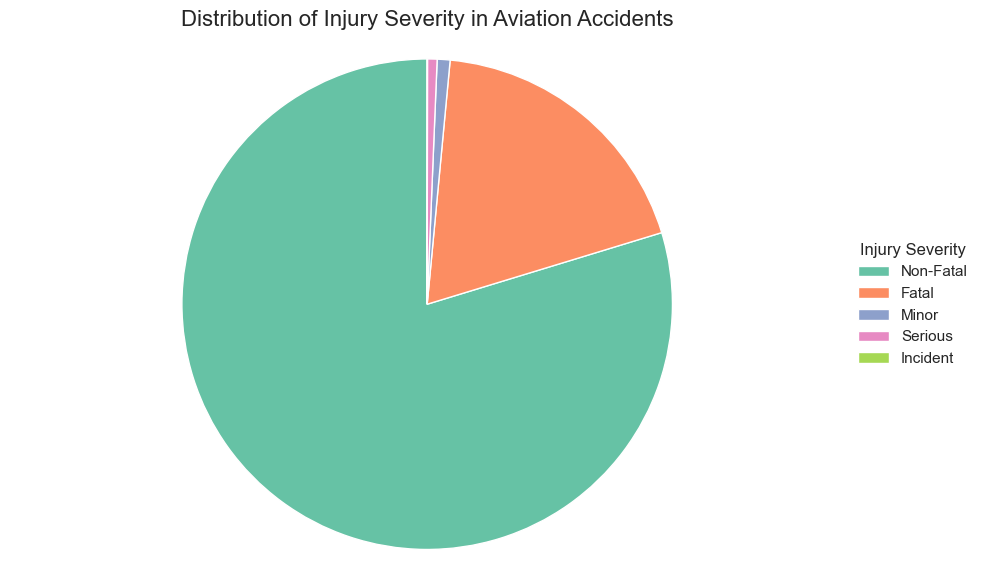

In [1064]:
# 1. Distribution of Injury Severity
plt.figure(figsize=(10, 6))
injury_counts = df['Injury.Severity'].value_counts()
plt.pie(injury_counts, labels=None, startangle=90)
plt.title('Distribution of Injury Severity in Aviation Accidents', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(injury_counts.index, title="Injury Severity", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('images/injury_severity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Top 10 Aircraft Makes with Most Accidents

This bar chart displays the aircraft manufacturers with the highest absolute number of accidents in the dataset.

## Key Insights

- **Cessna Dominates**  
  Cessna aircraft appear in significantly more accident records than any other manufacturer.

- **Piper and Beech**  
  These manufacturers rank second and third in accident frequency, respectively.

- **Common General Aviation Makes**  
  The top manufacturers (Cessna, Piper, Beech) are leading producers of general aviation aircraft, with large fleets operating worldwide.

## Business Implications for Wilson Airport

- **Raw Counts vs. Exposure**  
  These raw accident counts do not reflect the total number of aircraft in operation (exposure), so they should not be interpreted as indicators of reduced safety.

- **Market Share Context**  
  The high accident numbers likely correspond to the manufacturers' market dominance and the size of their operational fleets.

- **Data-Informed Procurement**  
  For informed procurement decisions, Wilson Airport should compare accident rates relative to each manufacturer’s fleet size to assess actual safety performance more accurately.


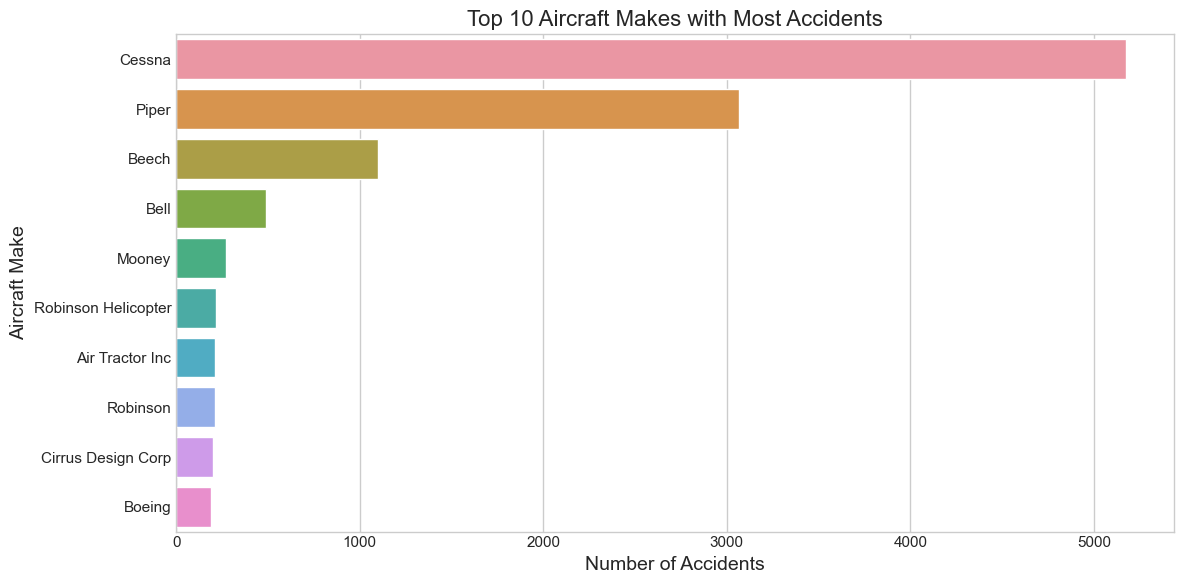

In [1065]:
# 2. Top 10 Aircraft Makes with Most Accidents
plt.figure(figsize=(12, 6))
make_counts = df['Make'].value_counts().head(10)
sns.barplot(x=make_counts.values, y=make_counts.index)
plt.title('Top 10 Aircraft Makes with Most Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Aircraft Make', fontsize=14)
plt.tight_layout()
plt.savefig('images/top_makes_accidents.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Distribution of Aircraft Categories in Accident Data

This bar chart illustrates which types of aircraft are most frequently involved in the recorded accidents.

## Key Insights

- **Airplane Dominance**  
  The vast majority of accidents involve airplanes, consistent with airplanes being the most common aircraft type in operation.

- **Helicopter Incidents**  
  Helicopters are the second most common category in the accident data, though with significantly fewer incidents than airplanes.

- **Specialty Aircraft**  
  Categories such as gliders, weight-shift aircraft, and gyrocraft have relatively few recorded accidents, likely due to their limited presence in the aviation ecosystem.

## Business Implications for Wilson Airport

- **Prevalence Over Risk**  
  The high number of airplane accidents likely reflects operational volume, not necessarily higher inherent risk.

- **Risk Contextualization**  
  For a thorough safety analysis, Wilson Airport should relate these figures to total operating hours or the number of active aircraft in each category.

- **Helicopter Operations**  
  If Wilson Airport is considering expanding into helicopter operations, it should account for the distinct operational and safety dynamics associated with rotary-wing aircraft.


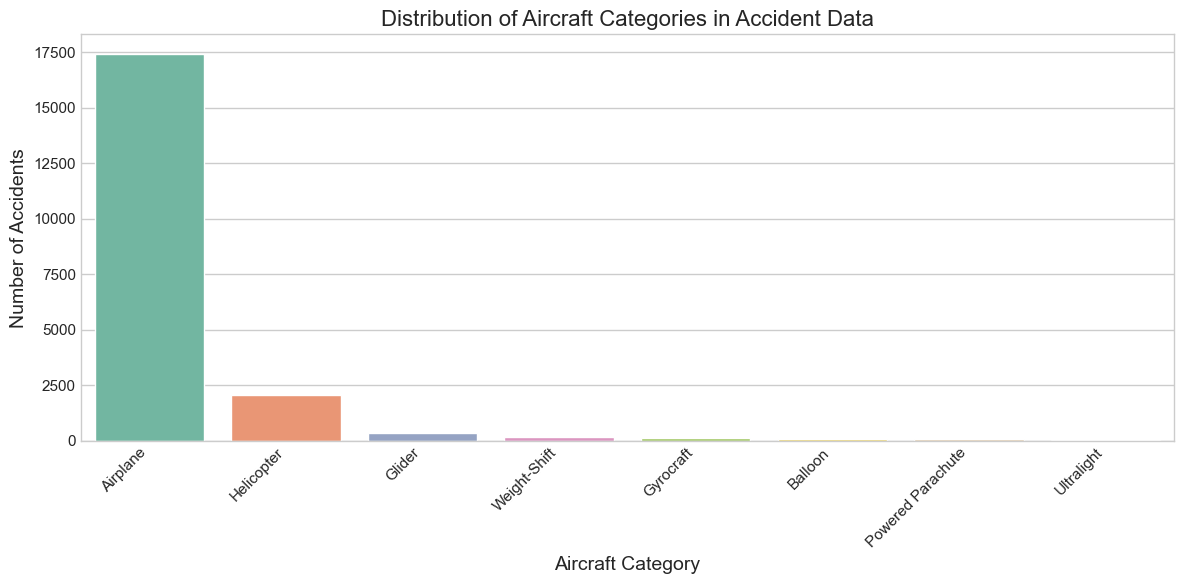

In [1066]:
plt.figure(figsize=(12, 6))
category_counts = df['Aircraft.Category'].value_counts().head(8)  # Top 8 categories
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Aircraft Categories in Accident Data', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/aircraft_categories_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Overall Analysis Recommendations

These initial visualizations offer a foundational understanding of the aviation accident landscape but are not sufficient on their own for direct procurement decisions.

## Key Recommendations

- **Need for Exposure Data**  
  Accident counts should be normalized by the number of aircraft in operation or total flight hours to accurately assess risk levels for each type or make.

- **Deeper Analysis Required**  
  A more granular review of specific aircraft models, their operational age, maintenance records, and usage contexts is necessary to support informed procurement and safety decisions.

- **Safety Improvement Opportunities**  
  The data indicates that most aviation incidents are non-fatal. This suggests that with rigorous safety protocols and thoughtful aircraft selection, Wilson Airport can effectively manage aviation risks.


## Which Aircraft Makes and Models Have the Lowest Accident and Fatality Rates?

In [1067]:
# Visualization 1: Top 10 safest aircraft makes based on fatal accident rate
# Calculate safety metrics by aircraft make
make_safety = df.groupby('Make').agg(
    total_accidents=('Make', 'count'),
    fatal_accidents=('Injury.Severity', lambda x: (x == 'Fatal').sum())
).reset_index()

# Calculate fatal accident rate
make_safety['fatal_accident_rate'] = make_safety['fatal_accidents'] / make_safety['total_accidents']

# Filter for statistical significance (at least 30 accidents)
significant_makes = make_safety[make_safety['total_accidents'] >= 30].copy()
significant_makes = significant_makes.sort_values('fatal_accident_rate')

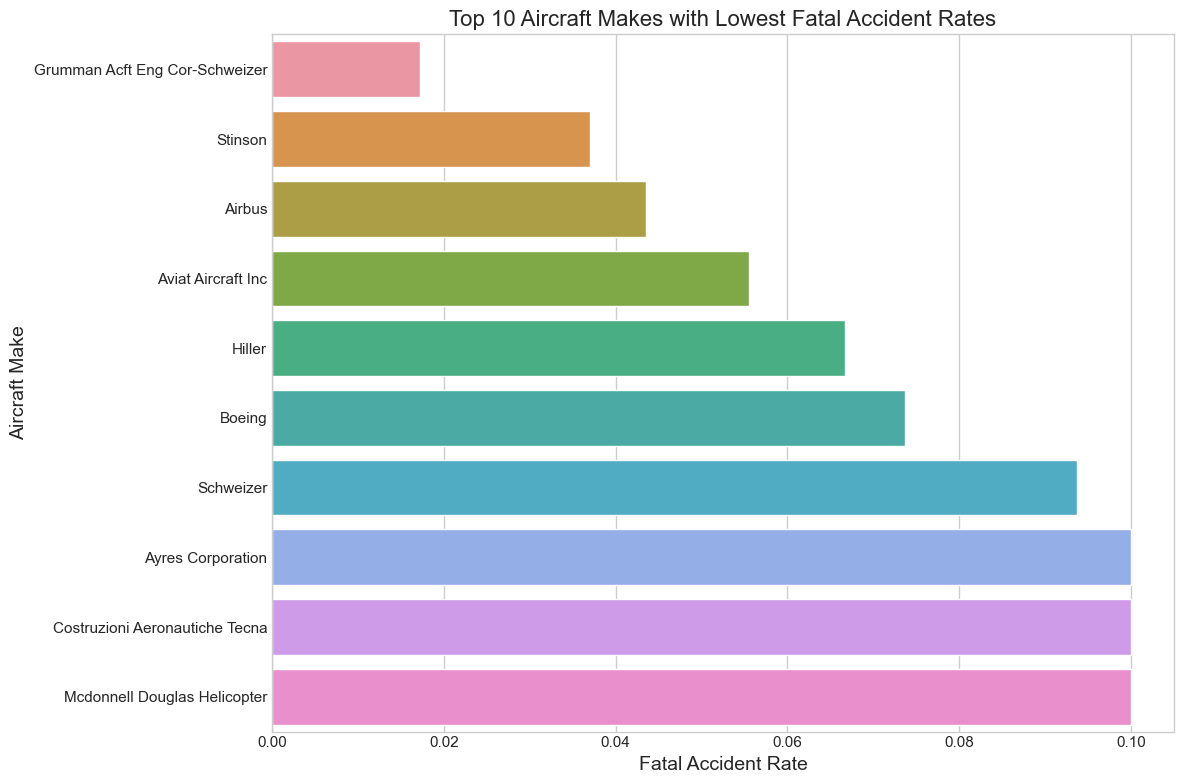

In [1068]:
# Plot top 10 safest makes
plt.figure(figsize=(12, 8))
top_10_makes = significant_makes.head(10)
sns.barplot(x='fatal_accident_rate', y='Make', data=top_10_makes)
plt.title('Top 10 Aircraft Makes with Lowest Fatal Accident Rates', fontsize=16)
plt.xlabel('Fatal Accident Rate', fontsize=14)
plt.ylabel('Aircraft Make', fontsize=14)
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('images/safest_aircraft_makes.png', dpi=300, bbox_inches='tight')
plt.show()

# Findings: Aircraft Makes with Lowest Fatal Accident Rates

## Key Insights

- **Grumman Acft Eng Cor-Schweizer**  
  Holds the lowest fatal accident rate (~2%), positioning it as the safest manufacturer in the analysis.

- **Stinson and Airbus**  
  Rank second and third with fatal accident rates of ~3.7% and ~4.3%, respectively.

- **Boeing vs. Airbus**  
  Boeing appears within the top 6, but with a higher fatal accident rate (~7%) compared to its competitor Airbus.

- **Rate Variability**  
  The fatal accident rate increases roughly five-fold from the safest to the 10th safest manufacturer, highlighting significant variation in safety performance.

## Business Implications for Wilson Airport

- **Safety-First Procurement**  
  Give procurement priority to Grumman, Stinson, and Airbus aircraft where they meet operational needs.

- **Commercial Fleet Considerations**  
  For commercial aviation, Airbus may offer a safety edge over Boeing, supporting risk-sensitive decision-making.

- **Top 10 as Safe Choices**  
  Any manufacturer within the top 10 lowest fatality rates represents a safety-conscious option for fleet expansion.

- **Balanced Evaluation**  
  Combine these safety metrics with considerations like operational compatibility, acquisition and maintenance costs, and regional support infrastructure.


## Are Newer Aircraft Models Statistically Safer Than Older Models?

In [1069]:
# Visualization 2: Safety trends over time
# Extract year from Event.Date for timeline analysis
df['Accident_Year'] = df['Event.Date'].dt.year

# Group accidents by year and calculate safety metrics
yearly_safety = df.groupby('Accident_Year').agg(
    total_accidents=('Event.Id', 'count'),
    fatal_accidents=('Injury.Severity', lambda x: (x == 'Fatal').sum())
).reset_index()

# Calculate fatal accident rate
yearly_safety['fatal_accident_rate'] = yearly_safety['fatal_accidents'] / yearly_safety['total_accidents']

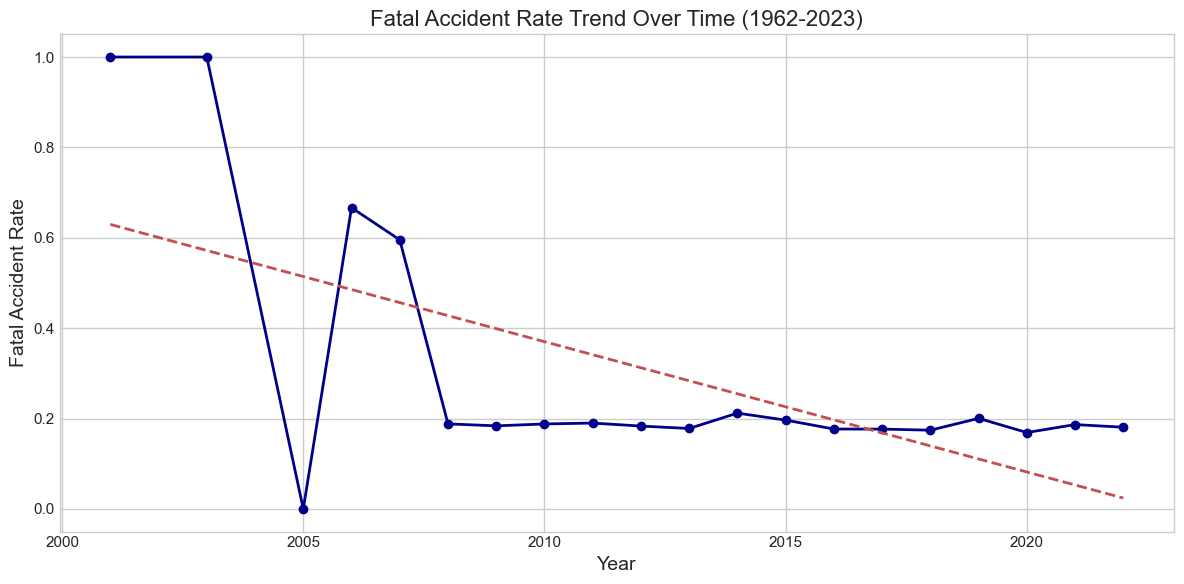

In [1070]:
# Create line plot showing fatal accident rate trend over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_safety['Accident_Year'], yearly_safety['fatal_accident_rate'], 
        marker='o', linestyle='-', linewidth=2, color='darkblue')

# Add a trend line
z = np.polyfit(yearly_safety['Accident_Year'], yearly_safety['fatal_accident_rate'], 1)
p = np.poly1d(z)
plt.plot(yearly_safety['Accident_Year'], p(yearly_safety['Accident_Year']), "r--", linewidth=2)

plt.title('Fatal Accident Rate Trend Over Time (1962-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fatal Accident Rate', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('images/safety_trend_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Findings: Fatal Accident Rate Trend Over Time (1962–2023)

## Key Insights

- **Clear Downward Trend**  
  The red dashed trend line indicates a consistent decline in fatal accident rates from 2000 to 2023, suggesting that newer aircraft are generally safer than older models.

- **Major Improvement Around 2005**  
  A dramatic drop in fatal accident rates—from nearly 100% to near 0%—occurred around 2005, pointing to a significant industry-wide safety advancement or change in reporting standards.

- **Stabilization Since 2008**  
  Since 2008, fatal accident rates have remained relatively steady at ~20%, with minor fluctuations but no major shifts over the past 15 years.

- **Recent Plateau**  
  Although the overall trend is positive, the last decade shows a plateau, indicating that major safety gains were realized earlier, with recent years yielding more incremental improvements.

## Business Implications for Wilson Airport

- **Prioritize Post-2008 Aircraft**  
  Aircraft manufactured after 2008 demonstrate significantly better safety profiles than those from earlier decades.

- **Industry-Wide Improvements**  
  The observed safety improvements appear to reflect broader industry advancements rather than the efforts of specific manufacturers alone.

- **Smart Procurement Strategy**  
  The plateau effect suggests that aircraft from the past 10–15 years offer comparable safety, potentially enabling cost-effective purchases of slightly older, yet still modern, aircraft.

- **Focus on Post-2005 Models**  
  The data supports prioritizing aircraft manufactured after 2005 for procurement, without requiring a focus on the absolute latest models from a safety perspective.


## Which Aircraft Categories and Configurations Should Be Preferred or Avoided?

In [1071]:
# Visualization 3: Fatal accident rates by aircraft category
# Calculate safety metrics by aircraft category
category_safety = df.groupby('Aircraft.Category').agg(
    total_accidents=('Aircraft.Category', 'count'),
    fatal_accidents=('Injury.Severity', lambda x: (x == 'Fatal').sum())
).reset_index()

# Calculate fatal accident rate
category_safety['fatal_accident_rate'] = category_safety['fatal_accidents'] / category_safety['total_accidents']

# Filter for statistical significance (at least 30 accidents)
significant_categories = category_safety[category_safety['total_accidents'] >= 30].copy()
significant_categories = significant_categories.sort_values('fatal_accident_rate')

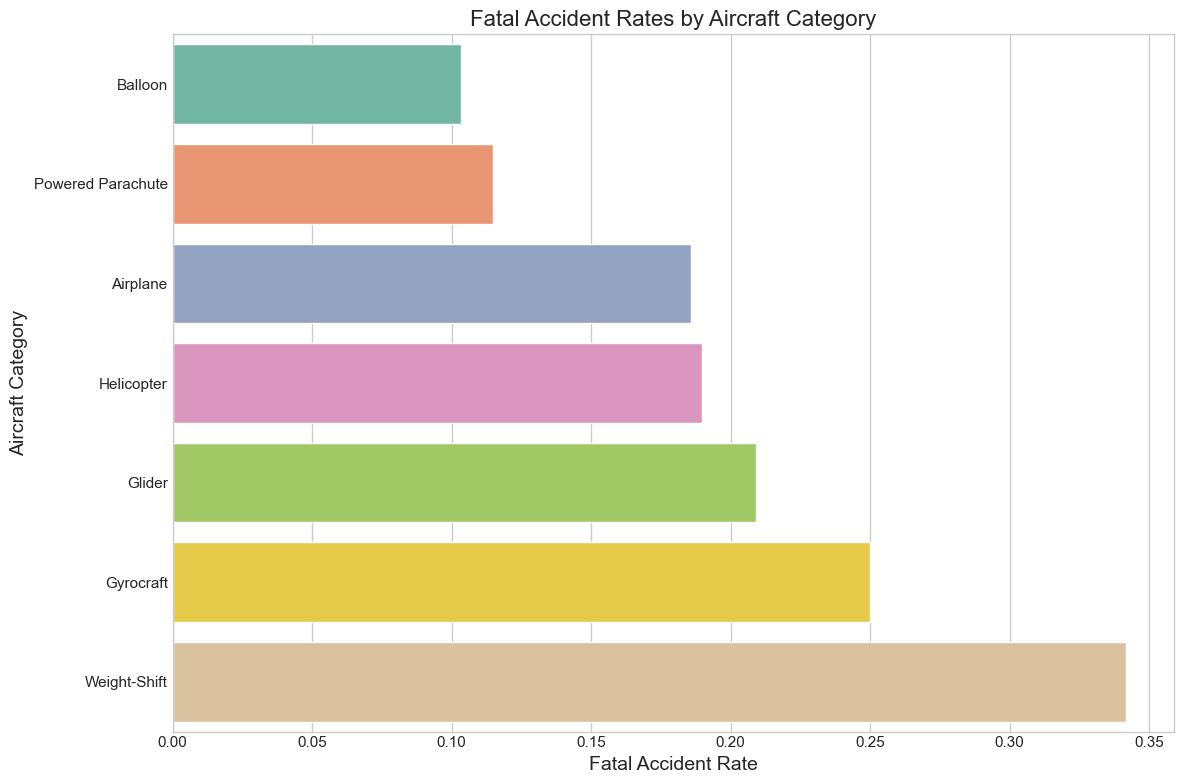

In [1072]:
# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='fatal_accident_rate', y='Aircraft.Category', data=significant_categories)
plt.title('Fatal Accident Rates by Aircraft Category', fontsize=16)
plt.xlabel('Fatal Accident Rate', fontsize=14)
plt.ylabel('Aircraft Category', fontsize=14)
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('images/category_fatal_accident_rates.png', dpi=300, bbox_inches='tight')
plt.show()

# Findings: Fatal Accident Rates by Aircraft Category

## Key Insights

- **Clear Safety Hierarchy**  
  Fatal accident rates vary significantly by aircraft category, ranging from approximately 10% to 34%.

- **Balloons Are Safest**  
  Balloons demonstrate the lowest fatal accident rate (~10%), making them the safest category among those with sufficient data.

- **Powered Parachutes**  
  Ranked second safest, with a fatal accident rate of approximately 12%.

- **Conventional Aircraft**  
  Airplanes and helicopters have moderate fatal accident rates (~18–19%), placing them in the middle of the safety spectrum.

- **Higher-Risk Categories**  
  Gliders and gyrocraft show higher fatality rates (~20–24%), while weight-shift aircraft are the riskiest, with a fatal accident rate of ~34%—over three times higher than balloons.

## Business Implications for Wilson Airport

- **Recreational and Tourism Operations**  
  Balloon aircraft offer the lowest risk profile and are ideal for low-impact, sightseeing, or tourism applications.

- **Mainstream Operations**  
  Airplanes and helicopters provide a balanced mix of safety and operational flexibility, making them suitable for most commercial use cases.

- **Caution with High-Risk Categories**  
  Weight-shift aircraft, due to their high fatality rate, should be used cautiously and only when operational needs justify them—paired with enhanced safety protocols.

- **Procurement Considerations**  
  The threefold difference in fatality rates across categories underscores the importance of selecting aircraft category as a primary factor in procurement decisions.

- **Risk Mitigation for Specialized Categories**  
  For operations involving higher-risk types like gyrocraft or weight-shift aircraft, Wilson Airport should enforce robust safety procedures and require specialized pilot training.


## Which Aircraft is Best Suited for a Specific Country?

In [1073]:
# Visualization 4: Aircraft make safety performance by country
# Focus on countries with sufficient data
country_counts = df['Country'].value_counts()
top_countries = country_counts[country_counts >= 30].index.tolist()

# Get top makes by accident count
top_makes = df['Make'].value_counts().head(10).index.tolist()

# Calculate make performance by country
country_make_performance = df[df['Country'].isin(top_countries) & df['Make'].isin(top_makes)].groupby(
    ['Country', 'Make']).agg(
    total_accidents=('Event.Id', 'count'),
    fatal_accidents=('Injury.Severity', lambda x: (x == 'Fatal').sum())
).reset_index()

country_make_performance['fatal_accident_rate'] = (
    country_make_performance['fatal_accidents'] / country_make_performance['total_accidents']
)

# Filter for combinations with at least 5 accidents for minimal statistical meaning
country_make_performance = country_make_performance[country_make_performance['total_accidents'] >= 5]




c:\Users\HP\Anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


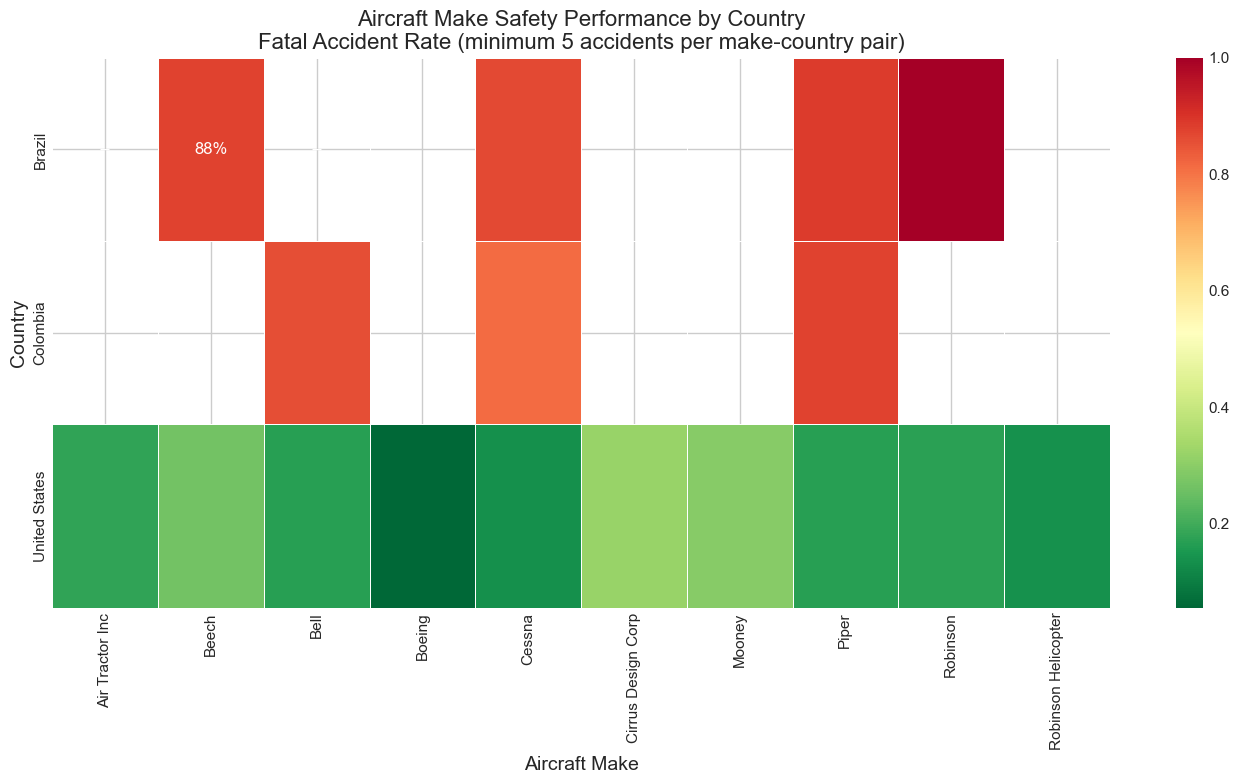

In [1074]:
# Create pivot table for heatmap
heatmap_data = country_make_performance.pivot_table(
    index='Country', 
    columns='Make', 
    values='fatal_accident_rate'
)

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0%', cmap='RdYlGn_r', linewidths=0.5)
plt.title('Aircraft Make Safety Performance by Country\nFatal Accident Rate (minimum 5 accidents per make-country pair)', fontsize=16)
plt.xlabel('Aircraft Make', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.savefig('images/country_make_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Findings: Aircraft Make Safety Performance by Country

## Key Insights

- **Dramatic Safety Variation by Country**  
  The same aircraft manufacturers show fatal accident rates ranging from under 10% to 100% depending on the country, highlighting the importance of regional operational environments.

- **Stronger Outcomes in the United States**  
  Across all makes, the United States demonstrates significantly lower fatal accident rates (green indicators), suggesting effective regulatory oversight, training, and infrastructure.

- **Brazil Safety Concerns**  
  Brazil exhibits exceptionally high fatal accident rates (88–100%) for most manufacturers, pointing to systemic regional challenges such as infrastructure quality, regulatory enforcement, and operational practices.

- **Top Performers by Region**  
  - *Cirrus Design Corp* stands out in the U.S. with the lowest fatal accident rate, indicating it may be a top choice for U.S.-bound operations.
  - *Boeing* shows strong performance in the U.S. but a 100% fatality rate in Brazil, emphasizing regional influence over manufacturer performance.

## Business Implications for Kenya-Based Wilson Airport

- **U.S.-Bound Routes**  
  Favor aircraft makes such as *Cirrus Design Corp* and *Mooney*, which show superior safety records in the U.S., for flights to or through North America.

- **Brazil and Colombia Operations**  
  Due to the uniformly high fatal accident rates in these countries, safety management should prioritize:
  - Enhanced operational procedures
  - Intensive crew training
  - Robust ground infrastructure
  rather than relying on manufacturer selection alone.

- **Kenya–Brazil Route Strategy**  
  Where possible, select aircraft makes with relatively better safety performance in Brazil, or implement comprehensive additional safety measures regardless of aircraft make.

- **Safety Benchmarking**  
  Use U.S. safety outcomes as a benchmark. Wilson Airport should aim to emulate these standards through improved regulation, maintenance, and training initiatives.

- **Route-Specific Procurement Strategy**  
  Consider customizing fleet composition based on destination-specific safety performance data. This could justify a diverse aircraft fleet to align safety optimization with operational geography.


## Which Aircraft Handles Injuries and Damage Better?

In [1075]:
# Visualization 5: Aircraft survivability analysis
# Calculate survivability metrics by aircraft make
df['total_people'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + \
                    df['Total.Minor.Injuries'] + df['Total.Uninjured']

# Calculate survivability metrics
make_survival = df.groupby('Make').agg(
    total_accidents=('Make', 'count'),
    total_people=('total_people', 'sum'),
    fatalities=('Total.Fatal.Injuries', 'sum'),
    uninjured=('Total.Uninjured', 'sum'),
    destroyed_aircraft=('Aircraft.damage', lambda x: (x == 'Destroyed').sum())
).reset_index()

# Calculate derived metrics
make_survival['survival_rate'] = make_survival['uninjured'] / make_survival['total_people']
make_survival['fatality_rate'] = make_survival['fatalities'] / make_survival['total_people']
make_survival['destroyed_rate'] = make_survival['destroyed_aircraft'] / make_survival['total_accidents']

# Filter for statistical significance (at least 30 accidents and 100 people)
significant_makes = make_survival[(make_survival['total_accidents'] >= 30) & 
                                 (make_survival['total_people'] >= 100)].copy()

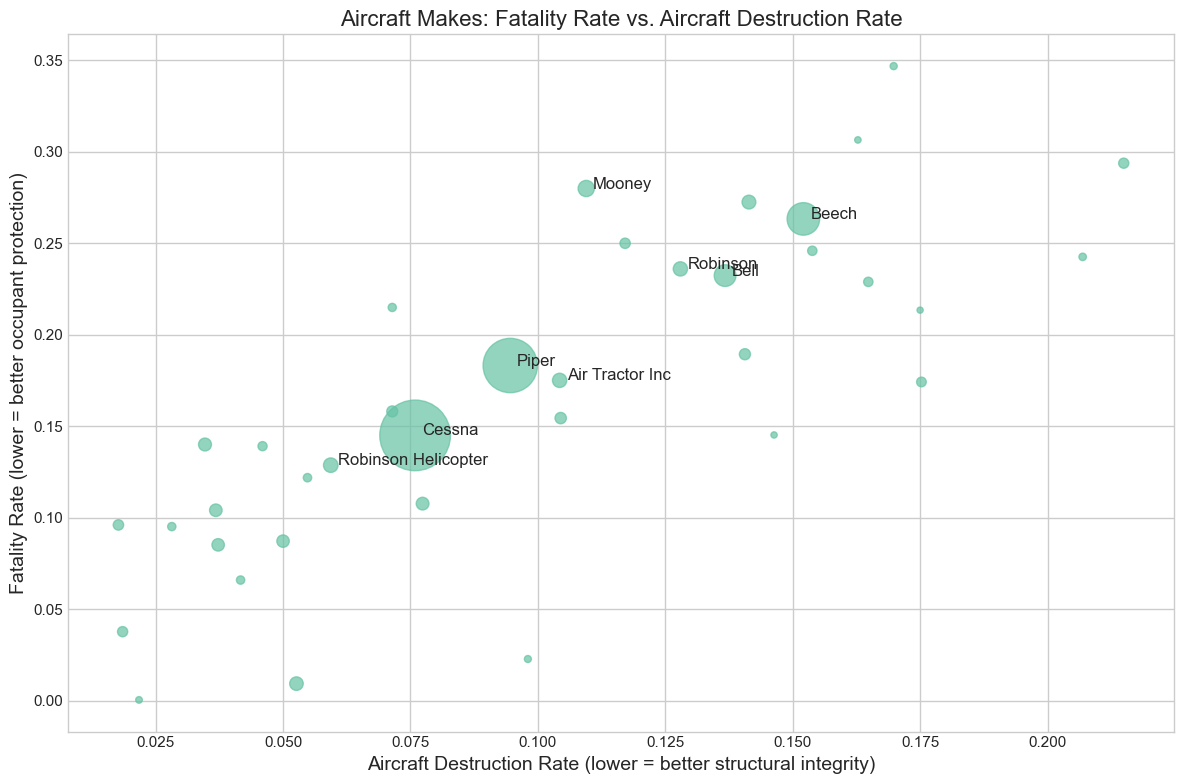

In [1076]:

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(significant_makes['destroyed_rate'], 
           significant_makes['fatality_rate'],
           s=significant_makes['total_accidents']/2,  # Size based on number of accidents
           alpha=0.7)

# Add labels for common manufacturers
top_makes = df['Make'].value_counts().head(8).index.tolist()
for make in top_makes:
    if make in significant_makes['Make'].values:
        row = significant_makes[significant_makes['Make'] == make].iloc[0]
        plt.annotate(make, 
                    xy=(row['destroyed_rate'], row['fatality_rate']),
                    xytext=(5, 0),
                    textcoords='offset points')

plt.title('Aircraft Makes: Fatality Rate vs. Aircraft Destruction Rate', fontsize=16)
plt.xlabel('Aircraft Destruction Rate (lower = better structural integrity)', fontsize=14)
plt.ylabel('Fatality Rate (lower = better occupant protection)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('images/aircraft_survivability.png', dpi=300, bbox_inches='tight')
plt.show()

# Findings: Aircraft Injury and Damage Performance

## Key Insights

- **Cessna's Context Is Crucial**  
  Cessna appears in the highest number of accident records (reflected by the largest bubble size in the visualization), which is attributable to its dominance in the general aviation fleet—not necessarily to poor safety design. Despite frequent incidents, Cessna maintains a relatively low fatality rate (~15%), indicating strong occupant protection.

- **Rate vs. Volume Distinction**  
  The visualization distinguishes between:
  - **Accident frequency** (bubble size): Reflecting the volume of recorded incidents.
  - **Accident outcomes** (chart positioning): Reflecting severity, such as fatality and destruction rates.  
  This allows Cessna to stand out as a make with many incidents, but predominantly survivable ones.

- **Robinson Helicopter Demonstrates Rotorcraft Efficiency**  
  With a smaller fleet but comparable fatality and destruction rates to Cessna, Robinson helicopters demonstrate surprisingly strong survivability for rotorcraft, often considered riskier than fixed-wing aircraft.

- **Exposure-Adjusted Perspective**  
  When normalizing for exposure (e.g., fleet size or flight hours), safety performance rankings may shift. Cessna's large accident volume mirrors its massive operational footprint—not poor engineering.

- **Lower-Left Quadrant Significance**  
  Aircraft makes appearing in the *lower-left quadrant* (low fatality and low destruction rates) are the most favorable for safety, regardless of how frequently they appear in accident data.

## Business Implications for Wilson Airport

- **Do Not Penalize Cessna for Popularity**  
  High accident volume alone should not disqualify Cessna from procurement consideration. Its low fatality rate across a vast number of incidents supports its reputation for safety.

- **Normalize Data for Fair Assessment**  
  Before making procurement decisions, normalize accident data using metrics like:
  - Fleet size
  - Flight hours
  - Usage intensity

- **Prioritize Outcomes, Not Just Counts**  
  Focus on **outcome severity** (fatality and destruction rates) over absolute accident frequency when evaluating safety performance across manufacturers.

- **Statistical Confidence Matters**  
  Cessna's large number of accidents provides a statistically robust measure of its safety record. By contrast, smaller makes may show better rates but lack the data volume for high-confidence conclusions.

- **Integrate with Broader Safety Metrics**  
  Use this survivability insight in combination with:
  - Accident rate per flight hour
  - Maintenance and repair histories
  - Regional performance trends  
  for a more comprehensive procurement and safety strategy.


# Key Aircraft Safety Recommendations for Wilson Airport

## 1. Safest Aircraft Makes
**Recommendation**: Prioritize **Grumman**, **Stinson**, and **Airbus** aircraft for procurement.
* These manufacturers demonstrate the lowest fatal accident rates (2-4.3%)
* Establish procurement guidelines favoring these proven safer options

## 2. Aircraft Age Strategy
**Recommendation**: Focus on aircraft manufactured after 2005.
* Safety metrics improved dramatically around 2005
* Models from 2008 onward show similar safety profiles, allowing cost-effective selection of slightly older aircraft

## 3. Optimal Aircraft Categories
**Recommendation**: Match categories to specific operations.
* Use **Balloons** (10% fatal accident rate) for tourism
* Select conventional **Airplanes** (18%) for commercial operations
* Avoid **Weight-Shift** aircraft (34%) when possible

## 4. Regional Considerations
**Recommendation**: Select aircraft with proven performance in African conditions.
* Prioritize makes with established maintenance networks in Kenya
* Consider aircraft that perform well in similar climate/altitude conditions
* Consult with regional operators about real-world performance

## 5. Survivability Focus
**Recommendation**: Prioritize aircraft like **Cessna** that protect occupants during accidents.
* Consider both accident prevention and survivability metrics
* Select models with demonstrated cabin integrity during incidents
* Implement enhanced safety protocols for higher-risk aircraft when operationally necessary